## Inbuilt Resnet Model
- K Bala Sai Manvitha - CS22B1030
- 21 Feb 2025

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import kagglehub

# Load dataset paths

dataset_path = kagglehub.dataset_download('adityakonduri/dl-lab4-dataset')
dataset_path = os.path.join(dataset_path, 'isic2020')

for d in os.listdir(dataset_path):
    print(d)

train_csv = os.path.join(dataset_path, "train.csv")
test_csv = os.path.join(dataset_path, "test.csv")
train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")

train
test
.ipynb_checkpoints
train.csv
test.csv


In [4]:
# Load and preprocess data
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

train_df["target"] = train_df["target"].astype(str)
test_df["target"] = test_df["target"].astype(str)

train_df.drop(columns=['patient_id', 'diagnosis', 'benign_malignant'], inplace = True)
test_df.drop(columns=['patient_id', 'diagnosis', 'benign_malignant'], inplace = True)

train_df.head()

train_df.head()

,image_name,sex,age_approx,anatom_site_general_challenge,target
0,ISIC_2637011,male,45.0,head/neck,0
1,ISIC_0015719,female,45.0,upper extremity,0
2,ISIC_0052212,female,50.0,lower extremity,0
3,ISIC_0068279,female,45.0,head/neck,0
4,ISIC_0074268,female,55.0,upper extremity,0


In [5]:
# One-hot encoding for categorical variables
train_df = pd.get_dummies(train_df, columns=['sex', 'anatom_site_general_challenge'], drop_first=True)

test_df = pd.get_dummies(test_df, columns=['sex', 'anatom_site_general_challenge'], drop_first=True)

In [6]:
train_df['image_path'] = train_df['image_name'].apply(lambda x: os.path.join(train_dir, x + ".jpg"))
train_df.head()

,image_name,age_approx,target,sex_male,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity,image_path
0,ISIC_2637011,45.0,0,True,False,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
1,ISIC_0015719,45.0,0,False,False,False,False,False,True,/root/.cache/kagglehub/datasets/adityakonduri/...
2,ISIC_0052212,50.0,0,False,True,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
3,ISIC_0068279,45.0,0,False,False,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
4,ISIC_0074268,55.0,0,False,False,False,False,False,True,/root/.cache/kagglehub/datasets/adityakonduri/...


In [7]:
test_df['image_path'] = test_df['image_name'].apply(lambda x: os.path.join(test_dir, x + ".jpg"))
test_df.head()

,image_name,age_approx,target,sex_male,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity,image_path
0,ISIC_0077472,40.0,0,False,False,False,False,True,False,/root/.cache/kagglehub/datasets/adityakonduri/...
1,ISIC_0080752,50.0,0,True,False,False,False,True,False,/root/.cache/kagglehub/datasets/adityakonduri/...
2,ISIC_0084395,45.0,0,False,False,False,False,True,False,/root/.cache/kagglehub/datasets/adityakonduri/...
3,ISIC_0086709,30.0,0,True,False,False,False,True,False,/root/.cache/kagglehub/datasets/adityakonduri/...
4,ISIC_0098784,70.0,0,False,True,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...


In [8]:
print(train_df['target'].value_counts())

target
0    29436
1      532
Name: count, dtype: int64


In [9]:
# Making a balanced dataframe of both classes

num_benign = train_df[train_df['target'] == '0'].shape[0]
num_malignant = train_df[train_df['target'] == '1'].shape[0]

print(num_benign)
print(num_malignant)

min_count = min(num_benign, num_malignant)

balanced_benign = train_df[train_df['target']=='0'].sample(n = min_count, random_state = 42)

balanced_malignant = train_df[train_df['target']=='1'].sample(n = min_count, random_state = 42)

balanced_df = pd.concat([balanced_benign, balanced_malignant], axis = 0)
balanced_df.head()

29436
532


,image_name,age_approx,target,sex_male,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity,image_path
11783,ISIC_3900049,40.0,0,False,False,False,False,True,False,/root/.cache/kagglehub/datasets/adityakonduri/...
25338,ISIC_8304618,55.0,0,False,False,False,False,True,False,/root/.cache/kagglehub/datasets/adityakonduri/...
6857,ISIC_2297858,45.0,0,False,True,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
3837,ISIC_1342117,55.0,0,False,False,False,False,False,True,/root/.cache/kagglehub/datasets/adityakonduri/...
3769,ISIC_1322575,55.0,0,False,False,False,False,True,False,/root/.cache/kagglehub/datasets/adityakonduri/...


In [10]:
# Making a balanced dataframe of both classes

num_benign = test_df[test_df['target'] == '0'].shape[0]
num_malignant = test_df[test_df['target'] == '1'].shape[0]

print(num_benign)
print(num_malignant)

min_count = min(num_benign, num_malignant)

balanced_benign_test = test_df[test_df['target']=='0'].sample(n = min_count, random_state = 42)

balanced_malignant_test = test_df[test_df['target']=='1'].sample(n = min_count, random_state = 42)

balanced_df_test = pd.concat([balanced_benign_test, balanced_malignant_test], axis = 0)
balanced_df_test.head()

2123
40


,image_name,age_approx,target,sex_male,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity,image_path
844,ISIC_4097143,25.0,0,False,True,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
1965,ISIC_9012721,70.0,0,True,False,False,False,True,False,/root/.cache/kagglehub/datasets/adityakonduri/...
1543,ISIC_7125485,70.0,0,True,False,False,False,True,False,/root/.cache/kagglehub/datasets/adityakonduri/...
834,ISIC_4038618,40.0,0,False,False,False,False,False,True,/root/.cache/kagglehub/datasets/adityakonduri/...
1533,ISIC_7063467,50.0,0,True,False,False,False,True,False,/root/.cache/kagglehub/datasets/adityakonduri/...


In [11]:
print(balanced_df['target'].value_counts())
print(balanced_df_test['target'].value_counts())

target
0    532
1    532
Name: count, dtype: int64
target
0    40
1    40
Name: count, dtype: int64


In [12]:
# Shuffle the dataset
balanced_df = balanced_df.sample(frac = 1, random_state = 42).reset_index(drop=True)

balanced_df.to_csv('balanced_dataset.csv', index = False)

In [13]:
# Shuffle the dataset
balanced_df_test = balanced_df_test.sample(frac = 1, random_state = 42).reset_index(drop=True)

balanced_df_test.to_csv('balanced_dataset_test.csv', index = False)

In [14]:
# Convert target column to string
balanced_df['target'] = balanced_df['target'].astype(str)
balanced_df_test['target'] = balanced_df_test['target'].astype(str)

In [15]:
# Splitting train into train and validation
balanced_df, val_df = train_test_split(balanced_df, test_size=0.2, stratify=balanced_df["target"], random_state=42)

In [16]:
train_df.head()

,image_name,age_approx,target,sex_male,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity,image_path
0,ISIC_2637011,45.0,0,True,False,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
1,ISIC_0015719,45.0,0,False,False,False,False,False,True,/root/.cache/kagglehub/datasets/adityakonduri/...
2,ISIC_0052212,50.0,0,False,True,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
3,ISIC_0068279,45.0,0,False,False,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
4,ISIC_0074268,55.0,0,False,False,False,False,False,True,/root/.cache/kagglehub/datasets/adityakonduri/...


In [17]:
# print(len(os.listdir(train_dir)))  # Count number of images
# print(os.listdir(train_dir)[:5])   # Show first 5 images

In [18]:
# train_df['image_path'] = train_df['image_name'].apply(lambda x: os.path.join(train_dir, x + ".jpg"))

In [19]:
train_df.head()

,image_name,age_approx,target,sex_male,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_upper extremity,image_path
0,ISIC_2637011,45.0,0,True,False,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
1,ISIC_0015719,45.0,0,False,False,False,False,False,True,/root/.cache/kagglehub/datasets/adityakonduri/...
2,ISIC_0052212,50.0,0,False,True,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
3,ISIC_0068279,45.0,0,False,False,False,False,False,False,/root/.cache/kagglehub/datasets/adityakonduri/...
4,ISIC_0074268,55.0,0,False,False,False,False,False,True,/root/.cache/kagglehub/datasets/adityakonduri/...


In [20]:
# Compute class weights for imbalance handling
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train_df["target"]), y=train_df["target"])
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [21]:
# Image preprocessing
def preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size) / 255.0
    return img

In [22]:
# Data Generators
train_datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20)
val_datagen = ImageDataGenerator()


In [23]:
def create_generator(df, directory, datagen, batch_size=32):
    return datagen.flow_from_dataframe(
        df,
        directory=directory,
        x_col="image_path",
        y_col="target",
        target_size=(224, 224),
        class_mode="binary",
        batch_size=batch_size,
        shuffle=True)

train_generator = create_generator(balanced_df, train_dir, train_datagen)
val_generator = create_generator(val_df, train_dir, val_datagen)

Found 851 validated image filenames belonging to 2 classes.
Found 213 validated image filenames belonging to 2 classes.


In [25]:
# Build ResNet-152 model
base_model = keras.applications.ResNet152(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

In [26]:
# Compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss="binary_crossentropy",
              metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


In [27]:
# Train model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weight_dict)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 355s 13s/step - accuracy: 0.5303 - loss: 7.0734 - precision: 0.5275 - recall: 0.7265 - val_accuracy: 0.4977 - val_loss: 2.6467 - val_precision: 0.4977 - val_recall: 1.0000
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 353s 13s/step - accuracy: 0.5043 - loss: 1.5593 - precision: 0.5042 - recall: 1.0000 - val_accuracy: 0.4977 - val_loss: 2.4781 - val_precision: 0.4977 - val_recall: 1.0000
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 337s 13s/step - accuracy: 0.5087 - loss: 1.3939 - precision: 0.5058 - recall: 1.0000 - val_accuracy: 0.4977 - val_loss: 1.9883 - val_precision: 0.4977 - val_recall: 1.0000
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 374s 12s/step - accuracy: 0.4843 - loss: 1.2797 - precision: 0.4781 - recall: 1.0000 - val_accuracy: 0.4977 - val_loss: 1.7325 - val_precision: 0.4977 - val_recall: 1.0000
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 330s 12s/step - accuracy: 0.5067 - loss: 1.2074 - precision: 0.4936 - recall: 1.0000 - val_accuracy: 0.4977 - val_loss: 1.

In [28]:
# Evaluate model
test_generator = create_generator(balanced_df_test, test_dir, val_datagen, batch_size=8)

results = model.evaluate(test_generator)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test Accuracy: {results[2]:.4f}")
print(f"Test Accuracy: {results[3]:.4f}")

Found 80 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.4782 - loss: 1.7670 - precision: 0.4404 - recall: 1.0000
Test Loss: 1.5036
Test Accuracy: 0.5500
Test Accuracy: 0.5263
Test Accuracy: 1.0000


In [29]:
from sklearn.metrics import classification_report

# Get true labels
true_labels = test_generator.classes  # Only works with flow_from_dataframe or flow_from_directory

# Get predicted labels
pred_probs = model.predict(test_generator)
pred_labels = np.argmax(pred_probs, axis=1)  # Convert softmax probabilities to class index

# Print classification report (includes precision, recall, F1-score)
report = classification_report(true_labels, pred_labels, target_names=test_generator.class_indices.keys())
print(report)

10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        40
           1       0.00      0.00      0.00        40

    accuracy                           0.50        80
   macro avg       0.25      0.50      0.33        80
weighted avg       0.25      0.50      0.33        80



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


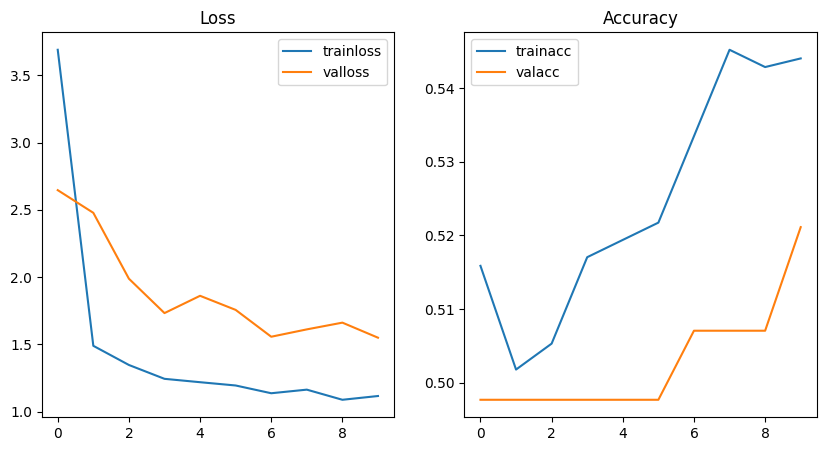

In [31]:
import matplotlib.pyplot as plt

trainloss = history.history["loss"]
valloss = history.history["val_loss"]
# testloss = history.history["test_loss"]

trainacc = history.history['accuracy']
valacc = history.history['val_accuracy']
# testacc = history.history['test_accuracy']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(trainloss, label = 'trainloss')
axes[0].plot(valloss, label = 'valloss')
# axes[0].plot(testloss, label = 'testloss')
axes[0].set_title('Loss')
axes[0].legend()

axes[1].plot(trainacc, label = 'trainacc')
axes[1].plot(valacc, label = 'valacc')
# axes[1].plot(testacc, label = 'testacc')
axes[1].set_title('Accuracy')
axes[1].legend()

plt.show()